In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

In [2]:
sp500_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'BRK.B', 'V', 'JPM', 'UNH', 'HD', 'PYPL', 'DIS', 'MA', 'PG',
    'VZ', 'NFLX', 'INTC', 'KO', 'PEP', 'BA', 'XOM', 'CVX', 'CSCO', 'WMT', 'T', 'MCD', 'ORCL', 'CAT', 'MRK', 'COST',
    'GE', 'BABA', 'ABBV', 'ADBE', 'AXP', 'CRM', 'AMGN', 'INTU', 'AMT', 'NKE', 'GS', 'WBA', 'SBUX', 'CSX', 'LMT', 'MDT', 'GS',
    'SPGI', 'BIIB', 'LUV', 'UNP', 'ISRG', 'CI', 'CVS', 'TMO', 'HON', 'LRCX', 'SHW', 'RTX', 'MMM', 'BKNG', 'ITW', 'FISV', 'MU',
    'QCOM', 'CHTR', 'STZ', 'TSCO', 'F', 'DE', 'NEE', 'MS', 'ZTS', 'WFC', 'PLD', 'AON', 'BMY', 'MMC', 'FIS', 'KHC', 'SLB', 'APD',
    'MDLZ', 'CHD', 'HUM', 'AIG', 'EL', 'SYK', 'HCA', 'DUK', 'ALL', 'C', 'OXY', 'HPE', 'SPG', 'SYY', 'VLO', 'ES', 'VMC', 'FTNT',
    'DHR', 'EOG', 'IT', 'AFL', 'NOC', 'COP', 'GILD', 'VRTX', 'WDC', 'MSCI', 'ADP', 'EXC', 'FANG', 'ZBH', 'CTSH', 'NEM', 'LHX',
    'DOW', 'BKR', 'APTV', 'TDG', 'CHKP', 'KMB', 'IQV', 'PFE', 'MU', 'BIIB', 'RMD', 'WEC', 'VFC', 'CME', 'LULU', 'MCK', 'ROST',
    'DG', 'O', 'TGT', 'SWKS', 'TROW', 'PKI', 'AEP', 'PEP', 'STT', 'MCO', 'AIZ', 'DHI', 'CTAS', 'SPGI', 'ADSK', 'FSLR', 'HIG',
    'CSX', 'NUE', 'TMUS', 'FTV', 'EXPD', 'BAX', 'MTD', 'SWK', 'ETN', 'MMC', 'FCX', 'KSU', 'PSX', 'WMT', 'RSG', 'LNC', 'PLUG',
    'TWTR', 'SQ', 'GOOG', 'MELI', 'DOCU', 'SPOT', 'BIDU', 'UBER', 'LYFT', 'PINS', 'SNAP', 'SQ', 'FSLR', 'SPLK', 'NVDA', 'PYPL',
    'RNG', 'VEEV', 'ZS', 'ZM', 'DOCU', 'MDB', 'PINS', 'COST', 'NTES', 'ROKU', 'INTC', 'COST', 'MRNA', 'VEEV', 'SHOP', 'FVRR',
    'WBA', 'NKE', 'TMO', 'IDXX', 'SWKS', 'MCD', 'AEP', 'AMT', 'EXC', 'KLAC', 'AON', 'VRTX', 'LULU', 'ZBH', 'HCA', 'FISV',
    'TGT', 'MU', 'AMT', 'UNP', 'CME', 'VFC', 'SYY', 'SYK', 'CVS', 'SBUX', 'PFE', 'TROW', 'NEE', 'SPLK', 'FIS', 'FANG', 'PNC',
    'TXN', 'CSCO', 'TMO', 'PGR', 'AMGN', 'SHOP', 'V', 'KMB', 'ROST', 'DXC', 'TAP', 'IDXX', 'BAX', 'LMT', 'RMD', 'ITW', 'RSG',
    'REGN', 'COST', 'LMT', 'DHR', 'JPM', 'C', 'LUV', 'HUM', 'APD', 'MS', 'HCA', 'WDC', 'ABT', 'COST', 'AMZN', 'MA', 'MSFT', 'VZ',
    'PFE', 'WMT', 'BMY', 'ZTS', 'GD', 'WFC', 'CHTR', 'GILD', 'FIS', 'ZBH', 'BIIB', 'LOW', 'NEE', 'VEEV', 'SWK', 'BA', 'MSCI',
    'AVGO', 'GS', 'MU', 'UNH', 'DE', 'KHC', 'EXC', 'XOM', 'PYPL', 'LHX', 'LULU', 'CVS', 'GE', 'DOW', 'BABA', 'MDT', 'AAPL',
    'HCA', 'BA', 'BAX', 'SBUX', 'NOC', 'LLY', 'ROKU', 'CHKP', 'SNAP', 'WEC', 'EL', 'COF', 'WMT', 'ZBH', 'PEP', 'EXPD', 'PLD',
    'SPGI', 'MRNA', 'AMGN', 'HD', 'INTC', 'BIIB', 'ORCL', 'PG', 'CME', 'FCX', 'ALGN', 'MMM', 'V', 'BMY', 'STZ', 'DHR', 'VMC',
    'COP', 'NTES', 'RTX', 'KO', 'GE', 'JNJ', 'AVGO', 'NSC', 'EOG', 'GPN', 'ADP', 'SYY', 'NEE', 'COST', 'SPGI', 'RSG', 'DLR',
    'BKR', 'SPLK', 'PLD', 'VFC', 'TMO', 'LMT', 'EOG', 'CVS', 'NEM', 'MRK', 'AMGN', 'GOOG', 'CAT', 'AIG', 'CVX', 'CVS', 'AIG',
    'TROW', 'CSX', 'MMC', 'RMD', 'HON', 'ZTS', 'AXP', 'T', 'ADSK', 'FTV', 'LHX', 'MSCI', 'PFE', 'DXC', 'LULU', 'PG', 'AMT',
    'BAX', 'CSCO', 'HCA', 'DIS', 'VZ', 'IQV', 'EXC', 'AXP', 'REGN', 'CTAS', 'WEC', 'FISV', 'UNP', 'PEP', 'VLO', 'NKE', 'TRV',
    'GE', 'NUE', 'NEE', 'INTC', 'ALXN', 'AON', 'IDXX', 'AAPL', 'WMT', 'TMO', 'MDT', 'HON', 'XOM', 'LMT', 'SBUX', 'MMM', 'KMB',
    'APD', 'WDC', 'MSCI', 'ZTS', 'KHC', 'GS', 'AIG', 'BMY', 'PYPL', 'WFC', 'LUV', 'PG', 'AMGN', 'ZBH', 'NVDA', 'TGT', 'CRM'
]



In [3]:
# data = yf.download(sp500_tickers, start='2000-01-01', end='2025-04-01', auto_adjust=True)

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'wb') as f:
#     pickle.dump(data, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'rb') as file:
    data = pickle.load(file)

In [4]:
df_sp500_price = data['Close'].dropna(axis=1).dropna()

In [5]:
df_sp500_return = data['Close'].dropna(axis=1).dropna().pct_change().dropna()

In [6]:
df_sp500_return.head()

Ticker,AAPL,ABT,ADBE,ADP,ADSK,AEP,AFL,AIG,ALL,AMGN,...,VLO,VMC,VRTX,VZ,WBA,WDC,WEC,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.084310,-0.028571,-0.083889,0.000000,-0.048689,0.011929,-0.026535,-0.051112,-0.031915,-0.076465,...,-0.009803,-0.003175,-0.079867,-0.032325,-0.037199,0.190476,0.006557,-0.049521,-0.037418,-0.019154
2000-01-05,0.014633,-0.001838,0.019771,-0.009616,-0.062992,0.037327,-0.005740,0.002376,0.043956,0.034409,...,0.036304,0.066880,-0.016275,0.033405,0.011364,-0.066667,0.045602,-0.010084,-0.020409,0.054515
2000-01-06,-0.086539,0.034991,0.008163,0.013350,-0.060924,0.005683,0.020203,0.030504,-0.005263,0.016632,...,0.031847,0.001492,-0.014706,-0.005079,-0.029214,0.042857,-0.003115,0.044142,0.010913,0.051698
2000-01-07,0.047369,0.010676,0.048583,0.022754,0.118568,0.013182,0.019802,0.074846,0.037037,0.112474,...,-0.012346,0.002981,0.087687,-0.007384,0.025463,0.232876,0.012500,0.017886,0.075565,-0.002934
2000-01-10,-0.017588,-0.007042,0.038610,0.024591,-0.010099,-0.003717,-0.059639,-0.017694,-0.022959,0.060662,...,-0.003125,0.040118,0.030875,-0.005313,0.029346,-0.111111,0.000000,-0.031949,-0.018249,-0.013981


In [7]:
df_sp500_tmp_close = data['Close']
df_sp500_tmp_volume = data['Volume']

In [8]:
df_sp500_tradingval_tmp = df_sp500_tmp_close * df_sp500_tmp_volume
df_sp500_tradingval = df_sp500_tradingval_tmp.dropna(axis=1).dropna()

In [9]:
layers = [df_sp500_price.head(10), df_sp500_return.head(10), df_sp500_tradingval.head(10)]

In [10]:
def granger_causality_all_pairs(df, max_lag=[1]):
    cols = df.columns

    num_columns = len(cols)
    p_values = np.zeros((num_columns, num_columns))

    for i in range(num_columns):
        for j in range(num_columns):
            if i != j:
                try:
                    result = grangercausalitytests(df[[df.columns[i], df.columns[j]]], max_lag)
                except:
                    print(" ======================== Exception ======================== ")
                    print(i,j)
                    print(df[[df.columns[i], df.columns[j]]])
                    input("Pass exception")
                    pass
                p_values[i, j] = result[1][0]['ssr_chi2test'][1]  # p-value of the test

    return p_values

In [11]:
layers_p_val = []
# for layer in layers:
#   p_values_matrix = granger_causality_all_pairs(layer, max_lag=1)
#   layers_p_val.append(p_values_matrix)


In [12]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'wb') as f:
#     pickle.dump(layers_p_val, f)

In [13]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'rb') as file:
    layers_p_val = pickle.load(file)

In [14]:
# # Plotting
# plt.imshow(p_values_matrix, cmap='coolwarm', interpolation='none')
# plt.colorbar(label='p-value')
# plt.title("Granger Causality Test P-values (t vs t-1) for NASDAQ-100 Securities")

# # Show the plot
# plt.tight_layout()

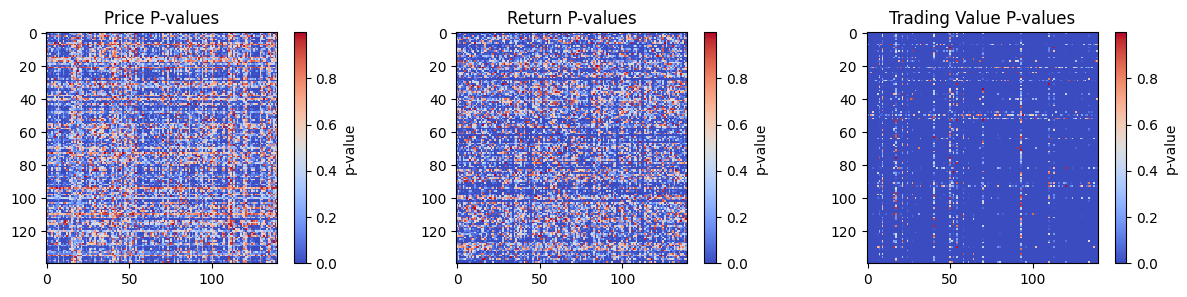

In [15]:
fig, axs = plt.subplots(1,3, figsize=(15, 3))

axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none')
axs[0].set_title('Price P-values')
fig.colorbar(axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none'), ax=axs[0], label='p-value')


axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none')
axs[1].set_title('Return P-values')
fig.colorbar(axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none'), ax=axs[1], label='p-value')


axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none')
axs[2].set_title('Trading Value P-values')
fig.colorbar(axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none'), ax=axs[2], label='p-value')


In [16]:
# Interlayers
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def build_weighted_adjacency_matrix_rf(target_df, feature_df, lag=1, n_estimators=100, random_state=42):
    """
    Build a weighted adjacency matrix using Random Forest feature importances as weights.

    Parameters:
    - target_df: DataFrame of prices (targets)
    - feature_df: DataFrame of volumes (features)
    - lag: How many time steps to shift feature_df
    - n_estimators: Number of trees in the forest
    - random_state: Random seed for reproducibility

    Returns:
    - weighted_adjacency_df: DataFrame (targets x features), weighted by feature importance
    """
    feature_df_shifted = feature_df.shift(lag)
    adjacency_data = []
    e = 0
    for target_col in target_df.columns:
        df_combined = pd.concat([feature_df_shifted, target_df[target_col]], axis=1).dropna()

        X = df_combined[feature_df.columns]
        y = df_combined[target_col]

        # Train RandomForest
        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        rf.fit(X, y)

        # Get feature importances
        importances = pd.Series(rf.feature_importances_, index=X.columns)
        if e > 20 : break
        e = e + 1

        print(" ====================== ")
        print(importances)
        print(" ====================== ")

        adjacency_data.append(importances)

    # Create weighted adjacency matrix
    weighted_adjacency_df = pd.DataFrame(adjacency_data, index=target_df.columns, columns=feature_df.columns)
    return weighted_adjacency_df


In [17]:
df_sp500_return.columns = [col + '_return' for col in df_sp500_return.columns]
df_sp500_price.columns = [col + '_price' for col in df_sp500_price.columns]


build_weighted_adjacency_matrix_rf(df_sp500_return[df_sp500_return.columns[0:10]], df_sp500_price[df_sp500_price.columns[0:10]], lag=1, n_estimators=100, random_state=42)

AAPL_price    0.115942
ABT_price     0.110884
ADBE_price    0.095994
ADP_price     0.092509
ADSK_price    0.094627
AEP_price     0.091642
AFL_price     0.090931
AIG_price     0.114296
ALL_price     0.087248
AMGN_price    0.105927
dtype: float64
AAPL_price    0.093699
ABT_price     0.122118
ADBE_price    0.099864
ADP_price     0.087181
ADSK_price    0.095007
AEP_price     0.090321
AFL_price     0.098443
AIG_price     0.102671
ALL_price     0.090414
AMGN_price    0.120283
dtype: float64
AAPL_price    0.096067
ABT_price     0.097486
ADBE_price    0.119456
ADP_price     0.089041
ADSK_price    0.097718
AEP_price     0.095270
AFL_price     0.093380
AIG_price     0.121465
ALL_price     0.095053
AMGN_price    0.095064
dtype: float64
AAPL_price    0.087687
ABT_price     0.103376
ADBE_price    0.095415
ADP_price     0.111969
ADSK_price    0.094917
AEP_price     0.098744
AFL_price     0.100336
AIG_price     0.095388
ALL_price     0.114652
AMGN_price    0.097515
dtype: float64
AAPL_price    0.0889

,AAPL_price,ABT_price,ADBE_price,ADP_price,ADSK_price,AEP_price,AFL_price,AIG_price,ALL_price,AMGN_price
AAPL_return,0.115942,0.110884,0.095994,0.092509,0.094627,0.091642,0.090931,0.114296,0.087248,0.105927
ABT_return,0.093699,0.122118,0.099864,0.087181,0.095007,0.090321,0.098443,0.102671,0.090414,0.120283
ADBE_return,0.096067,0.097486,0.119456,0.089041,0.097718,0.095270,0.093380,0.121465,0.095053,0.095064
ADP_return,0.087687,0.103376,0.095415,0.111969,0.094917,0.098744,0.100336,0.095388,0.114652,0.097515
ADSK_return,0.088960,0.103148,0.106028,0.091054,0.117254,0.099227,0.098118,0.098056,0.095827,0.102327
AEP_return,0.096645,0.095833,0.100169,0.094956,0.095933,0.144929,0.082301,0.087912,0.088394,0.112928
AFL_return,0.094946,0.091130,0.087298,0.079893,0.091174,0.091926,0.124022,0.129636,0.105600,0.104376
AIG_return,0.101051,0.112854,0.072784,0.097606,0.069553,0.077526,0.135543,0.140996,0.092339,0.099748
ALL_return,0.094350,0.110206,0.088125,0.093796,0.083752,0.092979,0.106349,0.102313,0.130597,0.097531
AMGN_return,0.087767,0.110110,0.085350,0.097730,0.101317,0.087330,0.087302,0.102443,0.102680,0.137970


from matplotlib import pyplot as plt
_df_0['AAPL_price'].plot(kind='hist', bins=20, title='AAPL_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ABT_price'].plot(kind='hist', bins=20, title='ABT_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ADBE_price'].plot(kind='hist', bins=20, title='ADBE_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ADP_price'].plot(kind='hist', bins=20, title='ADP_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AAPL_price', y='ABT_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ABT_price', y='ADBE_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ADBE_price', y='ADP_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='ADP_price', y='ADSK_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AAPL_price'].plot(kind='line', figsize=(8, 4), title='AAPL_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ABT_price'].plot(kind='line', figsize=(8, 4), title='ABT_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ADBE_price'].plot(kind='line', figsize=(8, 4), title='ADBE_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ADP_price'].plot(kind='line', figsize=(8, 4), title='ADP_price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print(temp)